# Clustering, PCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
df.to_csv('../static/model/iris.csv', index=False)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [8]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

In [9]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1', 'PC2'])
iris_pca_df['species'] = iris.target

iris_pca_df.head()

,PC1,PC2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_pca_df[['PC1', 'PC2']], iris.target, stratify=iris.target, test_size=0.3, random_state=2021
)

In [11]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.9111111111111111

In [12]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [13]:
df.to_csv('../static/model/wine.csv', index=False)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

wine_pca = pca.fit_transform(wine_std)
wine_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.3, random_state=2021
)

In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.8518518518518519

In [18]:
wine_pca_df = pd.DataFrame(data=wine_pca, columns=['PC1', 'PC2'])
wine_pca_df['target'] = wine.target
wine_pca_df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, random_state=2021) # kmeans 선택
kmeans.fit(df)

KMeans(max_iter=100, n_clusters=3, random_state=2021)

In [24]:
df['target'] = wine.target      # 실제 target class
df['cluster'] = kmeans.labels_  # Clustering 결과 도출된 class
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pca_x,pca_y,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,3.316751,-1.443463,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2.209465,0.333393,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2.516740,-1.031151,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,3.757066,-2.756372,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1.008908,-0.869831,1


In [25]:
df['pca_x'] = wine_pca[:, 0]
df['pca_y'] = wine_pca[:, 1]
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,pca_x,pca_y,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,3.316751,-1.443463,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,2.209465,0.333393,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,2.516740,-1.031151,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,3.757066,-2.756372,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,1.008908,-0.869831,1


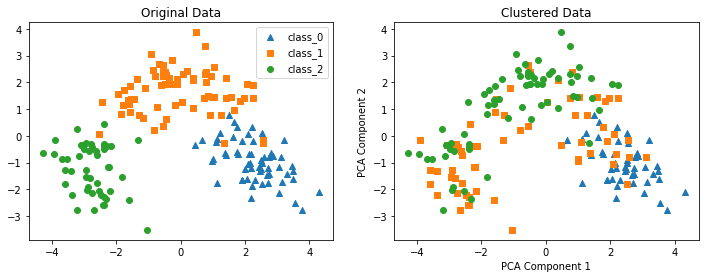

In [26]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2, nrows=1)
columns = ['target', 'cluster']
markers=['^', 's', 'o']

for k, column in enumerate(columns):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column]==i]['pca_x']
        y_axis_data = df[df[column]==i]['pca_y']
        ax.scatter(x_axis_data, y_axis_data,
        marker=marker, label=wine.target_names[i])

    if k == 0:
        ax.set_title('Original Data')
        ax.legend()
    else:
        ax.set_title('Clustered Data')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()